<a href="https://colab.research.google.com/github/Leviathan-Levi/NeuroAI/blob/main/tutorials/W2D2_NeuroSymbolicMethods/student/W2D2_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Basic operations of vector symbolic algebra

**Week 2, Day 2: Neuro-Symbolic Methods**

**By Neuromatch Academy**

__Content creators:__ P. Michael Furlong, Chris Eliasmith

__Content reviewers:__ Hlib Solodzhuk, Patrick Mineault, Aakash Agrawal, Alish Dipani, Hossein Rezaei, Yousef Ghanbari, Mostafa Abdollahi

__Production editors:__ Konstantine Tsafatinos, Ella Batty, Spiros Chavlis, Samuele Bolotta, Hlib Solodzhuk


___


# Tutorial Objectives

*Estimated timing of tutorial: 1 hour*

In this tutorial we will introduce vector symbolic algebra and discuss its main operations.

In [ ]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today

from IPython.display import IFrame
link_id = "2szmk"

print(f"If you want to download the slides: 'https://osf.io/download/{link_id}'")

IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)

---
# Setup



In [1]:
# @title Install and import feedback gadget

!pip install --quiet numpy matplotlib ipywidgets scipy vibecheck

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuromatch_neuroai",
            "user_key": "wb2cxze8",
        },
    ).render()


feedback_prefix = "W2D2_T1"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [2]:
# @title Install dependencies
# @markdown

# Install sspspace
!pip install git+https://github.com/ctn-waterloo/sspspace@neuromatch --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 26.1 MB/s eta 0:00:00


In [3]:
# @title Imports

#working with data
import numpy as np

#plotting
import matplotlib.pyplot as plt
import logging

#interactive display
import ipywidgets as widgets

#modeling
import sspspace
from scipy.special import softmax

In [4]:
# @title Figure settings

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perfrom high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting functions

def plot_vectors(concepts, labels, shape = (32, 32)):
    """
    Plot vector symbols associated with the given concepts.

    Inputs:
    - concepts (list of sspspace.ssp.SSP): list of concepts which contain associated vectors.
    - labels (list of str): list of strings which represent concepts.
    - shape (tuple, default = (32, 32)): desired image shape.
    """
    with plt.xkcd():
        n = len(concepts)
        for i in range(len(concepts)):
            plt.subplot(1,n,i+1)
            plt.imshow(concepts[i].view(dtype=float,type=np.ndarray).reshape(shape), cmap='Greys')
            plt.xticks([])
            plt.yticks([])
            plt.title(labels[i])

def plot_similarity_matrix(sim_mat, labels, values = False):
    """
    Plot the similarity matrix between vectors.

    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - labels (list of str): list of strings which represent concepts.
    - values (bool): True if we would like to plot values of similarity too.
    """
    with plt.xkcd():
        plt.imshow(sim_mat, cmap='Greys')
        plt.colorbar()
        plt.xticks(np.arange(len(labels)), labels, rotation=45, ha="right", rotation_mode="anchor")
        plt.yticks(np.arange(len(labels)), labels)
        if values:
            for x in range(sim_mat.shape[1]):
                for y in range(sim_mat.shape[0]):
                    plt.text(x, y, f"{sim_mat[y, x]:.2f}", fontsize = 8, ha="center", va="center", color="green")
        plt.title('Similarity between vector-symbols')
        plt.xlabel('Symbols')
        plt.ylabel('Symbols')
        plt.show()

def plot_line_similarity_matrix(sim_mat, xaxis_ticks, multiple_objects = True, labels = None, title = "Awesome title!"):
    """
    Plot similarirty matrix (or vector if multiple_objects is False) as lines.

    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - xaxis_ticks (list): list of ticks to put in x-axis.
    - multiple_objects (bool, default = True): True if there are a couple of objects to plot similarity.
    - labels (list, default = None): labels to plot.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        if multiple_objects:
            for idx, integer_sims in enumerate(sim_mat):
                if labels:
                    plt.plot(xaxis_ticks, integer_sims.flatten(), label=f'$\phi$[{idx+1}]', marker='o', ls='--')
                else:
                    plt.plot(xaxis_ticks, integer_sims.flatten(), marker='o', ls='--')
        else:
            plt.plot(xaxis_ticks,sim_mat.flatten(), ls='--',marker='o')

    plt.ylabel('Similarity')
    plt.xlabel('n')
    plt.xticks(xaxis_ticks)
    if labels:
        plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

def plot_double_line_similarity_matrix(sim_mat, xaxis_ticks, labels, title):
    """
    Plot similarirty matrix (or vector if multiple_objects is False) as lines for two different matrices.

    Inputs:
    - sim_mat (numpy.ndarray): list of similarity matrix between vectors.
    - xaxis_ticks (list): list of ticks to put in x-axis.
    - multiple_objects (bool, default = True): True if there are a couple of objects to plot similarity.
    - labels (list): labels to plot.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(xaxis_ticks,sim_mat[0].flatten(), ls='--',marker='o', label = labels[0])
        plt.plot(xaxis_ticks,sim_mat[1].flatten(), ls='--',marker='o', label = labels[1])
    plt.ylabel('Similarity')
    plt.xlabel('n')
    plt.xticks(xaxis_ticks)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

def plot_real_valued_line_similarity(sim_mat, x_range, title):
    """
    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - x_range (numpy.ndarray): x-axis range.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(x_range, sims)
    plt.xlabel('x')
    plt.ylabel('Similarity')
    plt.title(title)

In [6]:
# @title Set random seed

import random
import numpy as np

def set_seed(seed=None):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)

set_seed(seed = 42)

---

# Section 1: High-dimensional vector symbols

In this section, we are going to start our journey by representing concepts as high-dimensional vectors.

In [ ]:
# @title Video 1: Similarity

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'D9VzF9AyDic'), ('Bilibili', 'BV17x4y1b7ED')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_high_dimensional_vector_symbols")

## Coding Exercise 1: Concepts as High-Dimensional Vectors

In an arbitrary space of concepts, we will represent the ideas of 'circle,' 'square,' and triangle.' For that, we will use the SSP space library (`sspspace`) to map identifiers for the concepts (strings of their names in this case) into high-dimensional vectors of unit length. It means that for each `name`, we will uniquely identify $\mathbf{v}$ where $||\mathbf{v}|| = 1$.

In this exercise, check that, indeed, vectors are of unit length.

In [7]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete check that norms of the vector representations are of unit lengths.")
###################################################################

set_seed(42)

vector_length = 1024
symbol_names = ['circle','square','triangle']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=vector_length, optimize = False)
# sspspace.DiscreteSPSpace 是一个用于创建离散空间的类。在这个空间中，符号（如 'circle'，'square'，'triangle'）会被编码成指定维度的向量（ssp_dim=vector_length），optimize=False 表示不进行任何优化，使用默认的编码方式。

circle = discrete_space.encode('circle')
square = discrete_space.encode('square')
triangle = discrete_space.encode('triangle')
#在该离散空间中，符号 'circle' 被转换为一个固定长度的向量。discrete_space 是一个 DiscreteSPSpace 类的实例，表示一个离散的空间，用于对符号进行编码。encode('circle') 是 DiscreteSPSpace 类的一个方法，它将符号 'circle' 转换成一个向量表示。

print('|circle| =', np.linalg.norm(circle))
print('|triangle| =', np.linalg.norm(triangle))
print('|square| =', np.linalg.norm(square))

|circle| = 1.0
|triangle| = 1.0
|square| = 1.0


[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_a86d03c8.py)



We can visualize the assigned vectors as 32x32 images (notice that the dimension is 1024; it is exactly 32 multiplied by 32).

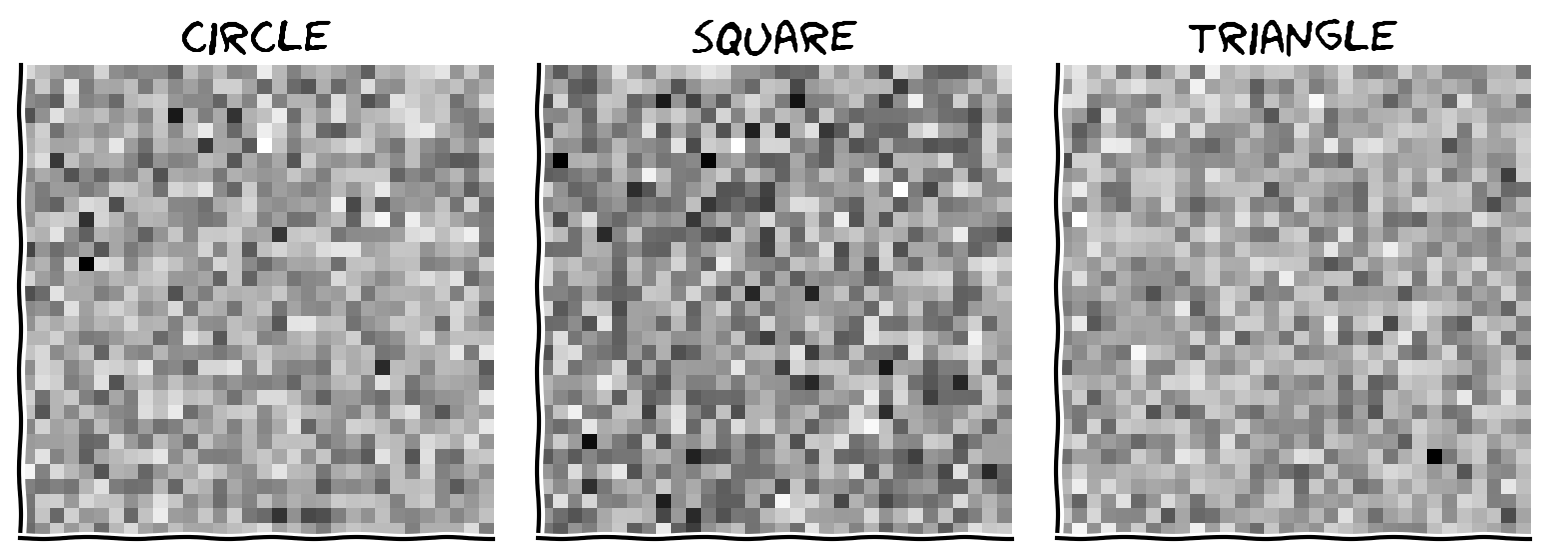

In [8]:
plot_vectors([circle, square, triangle], symbol_names)

As vectors are assigned randomly, the images do not display any meaningful structure.

One of the most useful properties of random high-dimensional vectors is that they are approximately orthogonal. This is an important aspect for vector symbolic algebras (VSAs) since we will use the vector dot product to measure similarity between objects encoded as random, high-dimensional vectors.

Discrete objects are either the same or different, so we expect similarity would be either 1 (the same) or 0 (not the same). Given how we select the vectors that represent discrete symbols if they are the same, they will have the dot product of 1, and if they are different concepts, then they will have a dot product of (approximately) 0.

Below, we use the | operator to indicate similarity. This is borrowed from the bra-ket notation in physics, i.e.,

$$
\mathbf{a}\cdot\mathbf{b} = \langle \mathbf{a} \mid \mathbf{b}\rangle
$$

Notice that this operator **| is** the **dot product** under the hood.

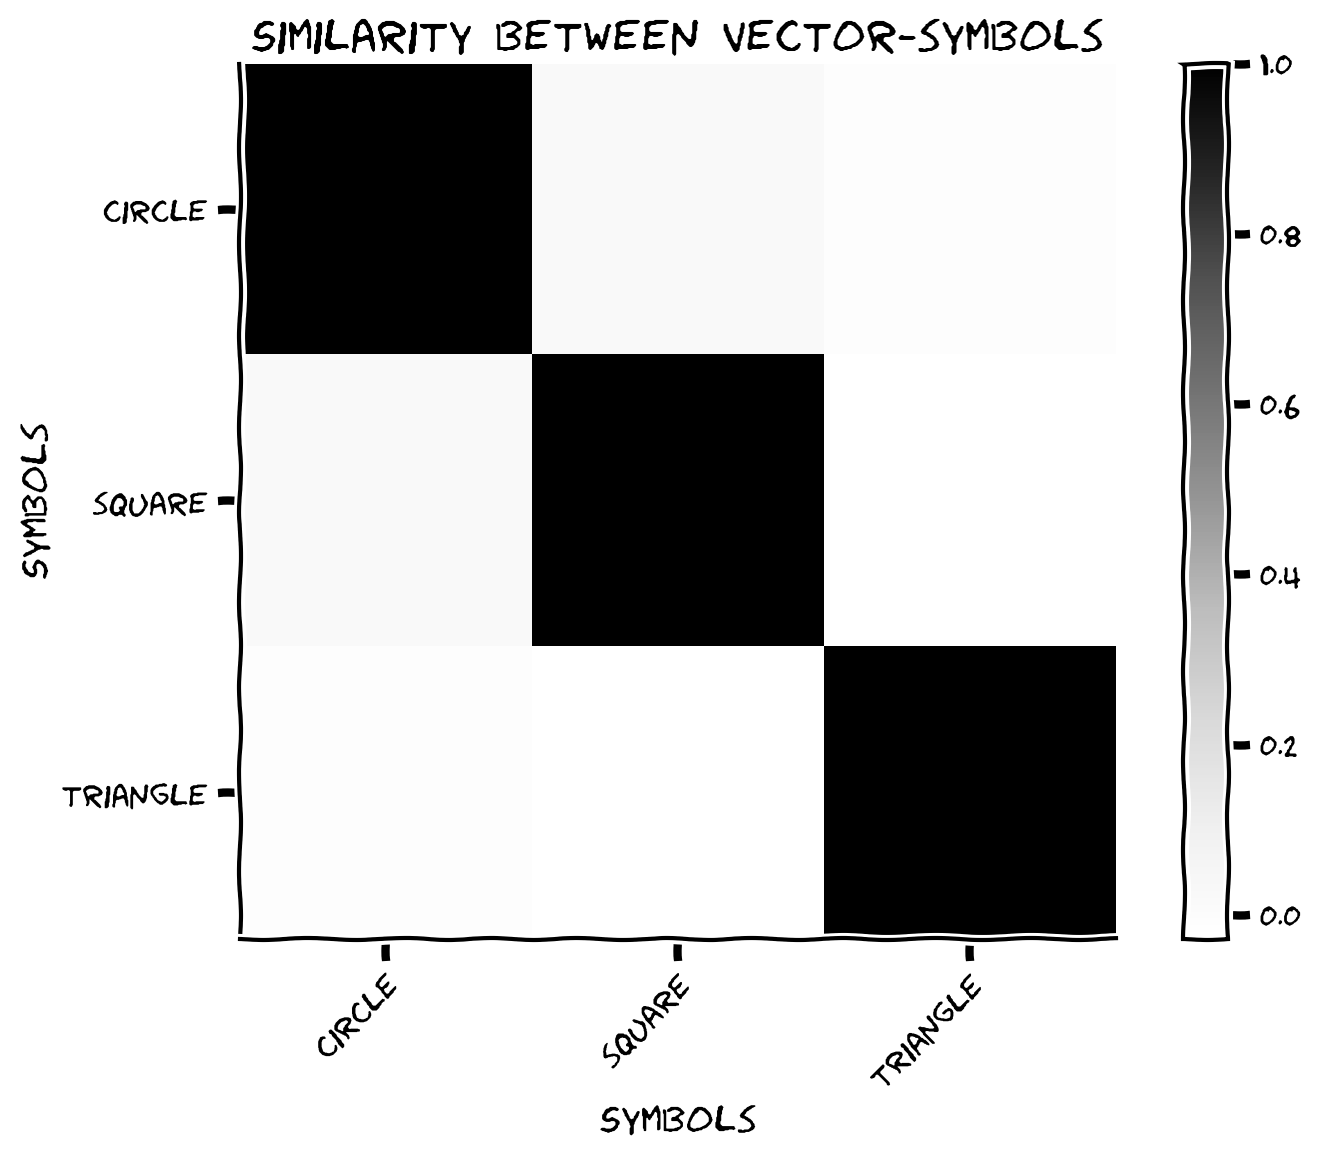

In [9]:
sim_mat = np.zeros((3,3))

sim_mat[0,0] = (circle | circle).item()
sim_mat[1,1] = (square | square).item()
sim_mat[2,2] = (triangle | triangle).item()

sim_mat[0,1] = sim_mat[1,0] = (circle | square).item()
sim_mat[0,2] = sim_mat[2,0] = (circle | triangle).item()
sim_mat[1,2] = sim_mat[2,1] = (square | triangle).item()

plot_similarity_matrix(sim_mat, symbol_names)

As you can see from the above figure, the three randomly selected vectors are approximately orthogonal. This will be important later when we go to make more complicated objects from our vectors.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_concepts_as_high_dimensional_vectors")

### Coding Exercise 1 Discussion

1. Can you provide an intuitive reason, or rigorous mathematical proof, behind the fact that random high-dimensional vectors are approximately orthogonal? Here each of the components of the vectors is drawn from a zero mean, independent and identical distribution, e.g. a normal distribution $\mathcal{N(0, 1)}$.

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_350b96a0.py)



---

# Section 2: Bundling

Estimated timing to here from start of tutorial: 10 minutes

In this section, we are going to explore the bundling operation, which allows us to construct vectors that represent something like sets. Basically, we combine two vectors into a new one that retains similarity to the previous two. We implement bundling using vector addition.

In [ ]:
# @title Video 2: Bundling

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'MzOjyvWTdmI'), ('Bilibili', 'BV1LS411P7pf')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_bundling")

## Coding Exercise 2: A Composite Object - Shape

Let's start with our previous example of different shapes (circle, square, and triangle) and use them to create a new object, 'shape,' which will represent all the atomic concepts we've introduced.

In [10]:
shape = (circle + square + triangle).normalize()

Notice that we need to normalize the obtained vector. Now, let us calculate the similarity matrix for the three default concepts and the new one.

In the exercise below, complete the similarity matrix calculation.

In [12]:
####################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete calcualtion of similarity matrix.")
###################################################################

sim_mat = np.zeros((4,4))

sim_mat[0,0] = (circle | circle).item()
sim_mat[1,1] = (square | square).item()
sim_mat[2,2] = (triangle | triangle).item()
sim_mat[3,3] = (shape | shape).item()

sim_mat[0,1] = sim_mat[1,0] = (circle | square).item()
sim_mat[0,2] = sim_mat[2,0] = (circle | triangle).item()
sim_mat[0,3] = sim_mat[3,0] = (circle | shape).item()

sim_mat[1,2] = sim_mat[2,1] = (square | triangle).item()
sim_mat[1,3] = sim_mat[3,1] = (square | shape).item()

sim_mat[2,3] = sim_mat[3,2] = (triangle | shape).item()

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_8d8fa911.py)



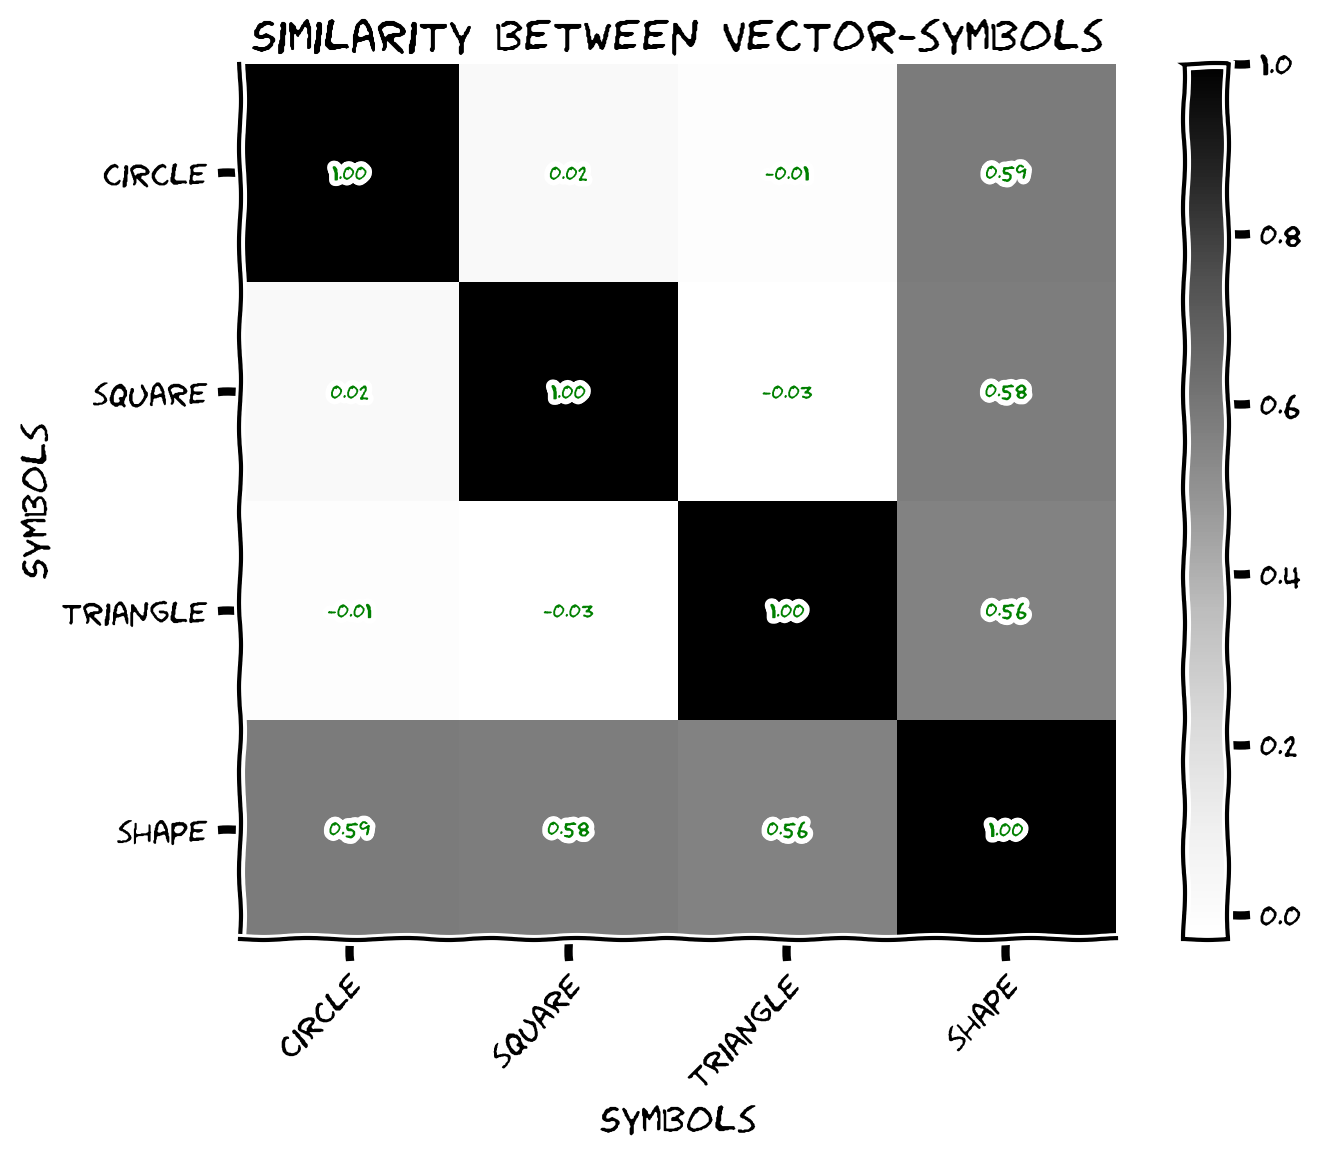

In [13]:
plot_similarity_matrix(sim_mat, symbol_names + ["shape"], values = True)

Observe that as each of the basic concepts was included equally in the definition of the 'shape' symbol, it has the same similarity between all other vectors, pairwise.

### Coding Exercise 2 Discussion

1. Why do we need to normalize the vector obtained as a result of the bundling operation? What length do you expect to receive without normalization?

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_b9294b66.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_composite_object_shape")

---

# Section 3: Binding & Unbinding

Estimated timing to here from start of tutorial: 20 minutes

In this section, we will talk about binding, an operation that takes two vectors and produces a new vector that is *not* similar to either of its constituent elements.

Binding and unbinding are implemented using circular convolution.  Luckily, that is implemented for you inside the SSPSpace library. If you would like a refresher on convolution, this [Three Blue One Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA) is a good place to start.

In [ ]:
# @title Video 3: Binding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'pSWjd3EcrXI'), ('Bilibili', 'BV19n4y197jt')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_binding")

## Coding Exercise 3: Colorful Shapes

We can think of binding as an "and"-like operation. Both arguments need to be the same to produce a similar vector. In this example, let's think about colors and shapes:

In [14]:
set_seed(42)

symbol_names = ['circle','square','triangle', 'red', 'blue', 'green']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=vector_length, optimize=False)

objs = {n:discrete_space.encode(np.array([n])) for n in symbol_names}

Now, we are going to take two of the objects to make new ones: a red circle, a blue triangle, and a green square.

We will combine the two primitive objects using the binding operation, which for us is implemented using circular convolution, and we denote it by

\begin{align*}
 a \circledast b
\end{align*}

<details>
<summary>Mathematical details</summary>

The circular convolution of two vectors $\mathbf{a}$ and $\mathbf{b} \in \mathbb{R}^N$ is defined as:

$$c_j = a \circledast b = \sum_{k=1}^{N} a_k b_{1 + (j-k) \mod N}$$

where $N$ is the length of the vectors, and $j$ is the index of the output vector. It's often more convenient to calculate the circular convolution in the Fourier domain. The circular convolution is equivalent to the element-wise product of the Fourier transforms of the two vectors, followed by an inverse Fourier transform:

$$a \circledast b = \mathcal{F}^{-1}(\mathcal{F}(\mathbf{a}) \odot \mathcal{F}(\mathbf{b}))$$
where $\mathcal{F}$ is the Fourier transform, $\odot$ is the element-wise product, and $\mathcal{F}^{-1}$ is the inverse Fourier transform. The equivalence between these two formulations is a consequence of the [convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem).

</details>

In the cell below, complete the missing concepts and then observe the computed similarity matrix.

In [15]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete derivation of new objects using binding operation.")
###################################################################

objs['red*circle'] = objs['red'] * objs['circle']
objs['blue*triangle'] = objs['blue'] * objs['triangle']
objs['green*square'] = objs['green'] * objs['square']

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_f9fa3af1.py)



Notice how we iterate through all objects in `object_names` and calculate pairwise dot products (similarity metric).

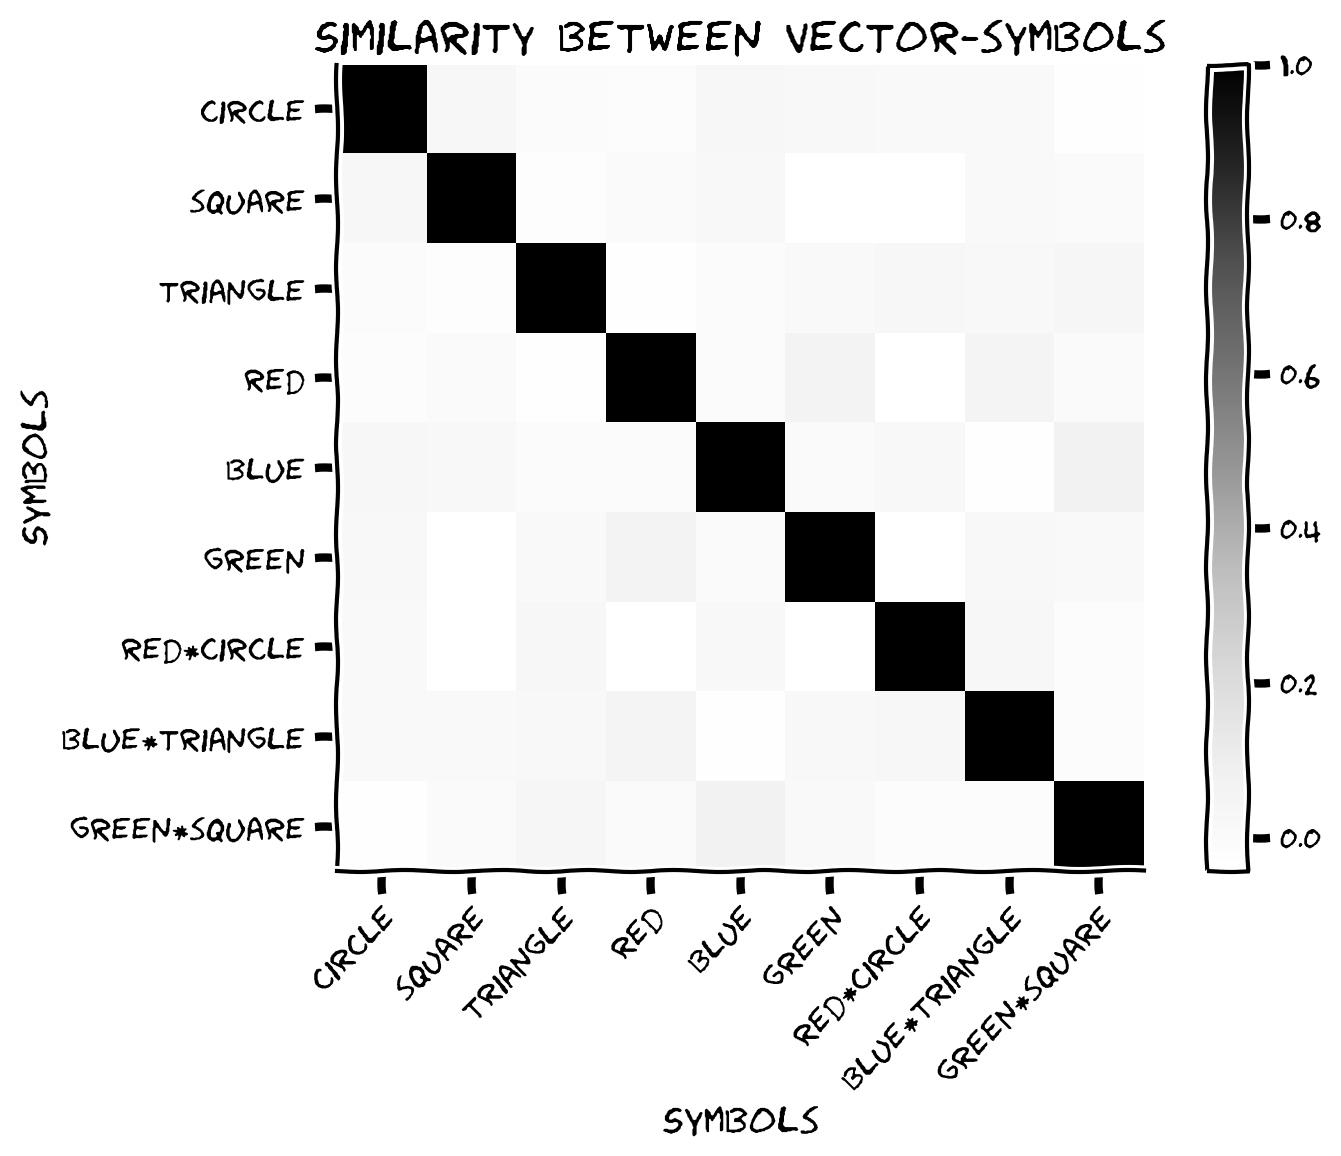

In [16]:
object_names = list(objs.keys())
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names)

As you can see here, not only do the shapes and colors have no similarity, but the compound objects also have no similarity with either of their constituent elements - `green * square` is not similar to either `green` or `square.`

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_colorful_shapes")

## Coding Exercise 4: Foundations of Colorful Shapes

In [ ]:
# @title Video 4: Unbinding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'vHHX98jBvk8'), ('Bilibili', 'BV1gZ421g7XT')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_unbinding")

We can also undo the binding operation, which we call unbinding. It is implemented by binding with the pseudo-inverse of the vector we wish to unbind. We denote the pseudo-inverse of the vector using the ~ symbol.

The SSPSpace library implements the pseudo-inverse for you, but the pseudo-inverse of a vector $\mathbf{x} = (x_{0},\ldots, x_{d-1})$ is defined:

$$\sim\mathbf{x} = \left(x_{0},x_{d-1},x_{d-2},\ldots,x_{1}\right)$$


Consider the example of our red circle. If we want to recover the shape of the object, we will unbind from it the color:

$$
(\mathtt{red} \circledast \mathtt{circle}) \circledast \sim \mathtt{red} \approx \mathtt{circle}
$$

<details>
<summary>Mathematical details</summary>

By the definition of the pseudo-inverse and circular convolution, we have:

$$\mathbf{x} \, \circledast \sim \mathbf{x} =
\sum_{k=1}^{N} x_k x_{1 + (j + k - 2) \mod N} \approx \delta_j$$

where $\delta_j$ is the Kronecker delta function. This is:

* exactly equal to 1 when $j=1$. This is because the vectors in SSP have a norm of 1.
* approximately 0 otherwise. This is because the vectors in SSP are random, and so a vector is approximately orthogonal to a shifted version of itself.

The Kronecker delta is the identity function for the circular convolution, and circular convolutions commute, hence:

$$
(\mathtt{a} \circledast \mathtt{b}) \circledast \sim \mathtt{a} = \mathtt{b} \circledast (\mathtt{a} \circledast \sim \mathtt{a}) \approx \mathtt{b} \circledast \delta = \mathtt{b}
$$

</details>

In the cell below, unbind the color and shape, and then observe the similarity matrix.

In [18]:
object_names = ['red','red^','red*circle','circle','circle^']

###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete derivation of default objects using pseudoinverse.")
###################################################################

objs['red^'] = objs['red*circle'] * ~objs['circle']
objs['circle^'] = objs['red*circle'] * ~objs['red']

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_685af726.py)



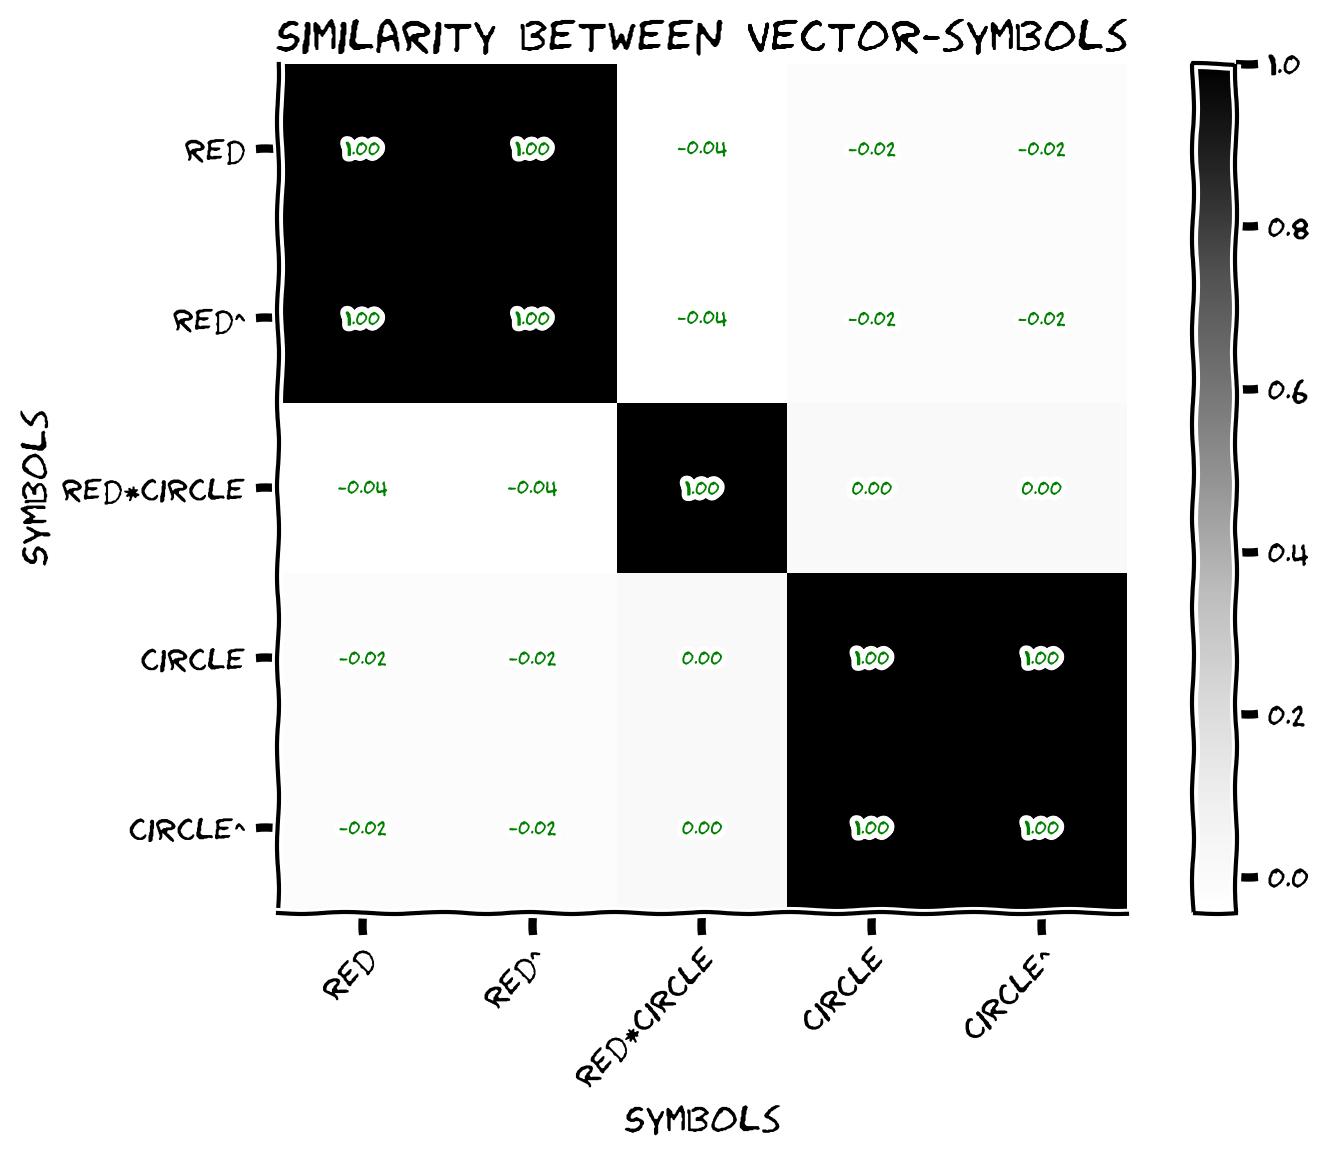

In [19]:
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names, values = True)

Looking at the above graph, we can see that the compound red circle object is not similar to either of the elements, but the circle and the unbound circle are similar to one another, and the red and unbound red objects are similar to one another.

With these elements together, we have constructed the basic tools we need to construct complex objects in vector symbolic algebra.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_foundations_of_colorful_shapes")

---

# Section 4: Cleanup

Estimated timing to here from start of tutorial: 30 minutes

In this section we will address the issue of vectors being corrupted with noise.

In [ ]:
# @title Video 5: Cleanup

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'eAdDocNOmSc'), ('Bilibili', 'BV1Jy411z7L6')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_cleanup")

## Coding Exercise 5: Cleanup Memories To Find The Best-Fit

In the process of computing with VSAs, the vectors themselves can become corrupted due to noise, because we implement these systems with spiking neurons, or due to approximations like using the pseudo-inverse for unbinding, or because noise gets added when we operate on complex structures.

To address this problem, we employ "cleanup memories."  These are lots of ways to implement these systems, but today, we're going to do it with a single hidden layer neural network.  Let's start with a sequence of symbols, say $\texttt{fire-fighter},\texttt{math-teacher},\texttt{sales-manager},$ and so on, in that fashion, and create a new vector that is a corrupted combination of all three.  We will then use a cleanup memory to find the best-fitting vector in our vocabulary.

In the cell below, you will see the definition of `noisy_vector`, your task is to complete the calculation of similarity values for this vector and all default ones.

Here, we introduce another graphical way to represent the similarity: by putting a similarity value on the y-axis (instead of the box in the grid) and representing each of the objects by line (the x-axis stays the same, and similarity takes place between the corresponding label on the x-axis and line-object).

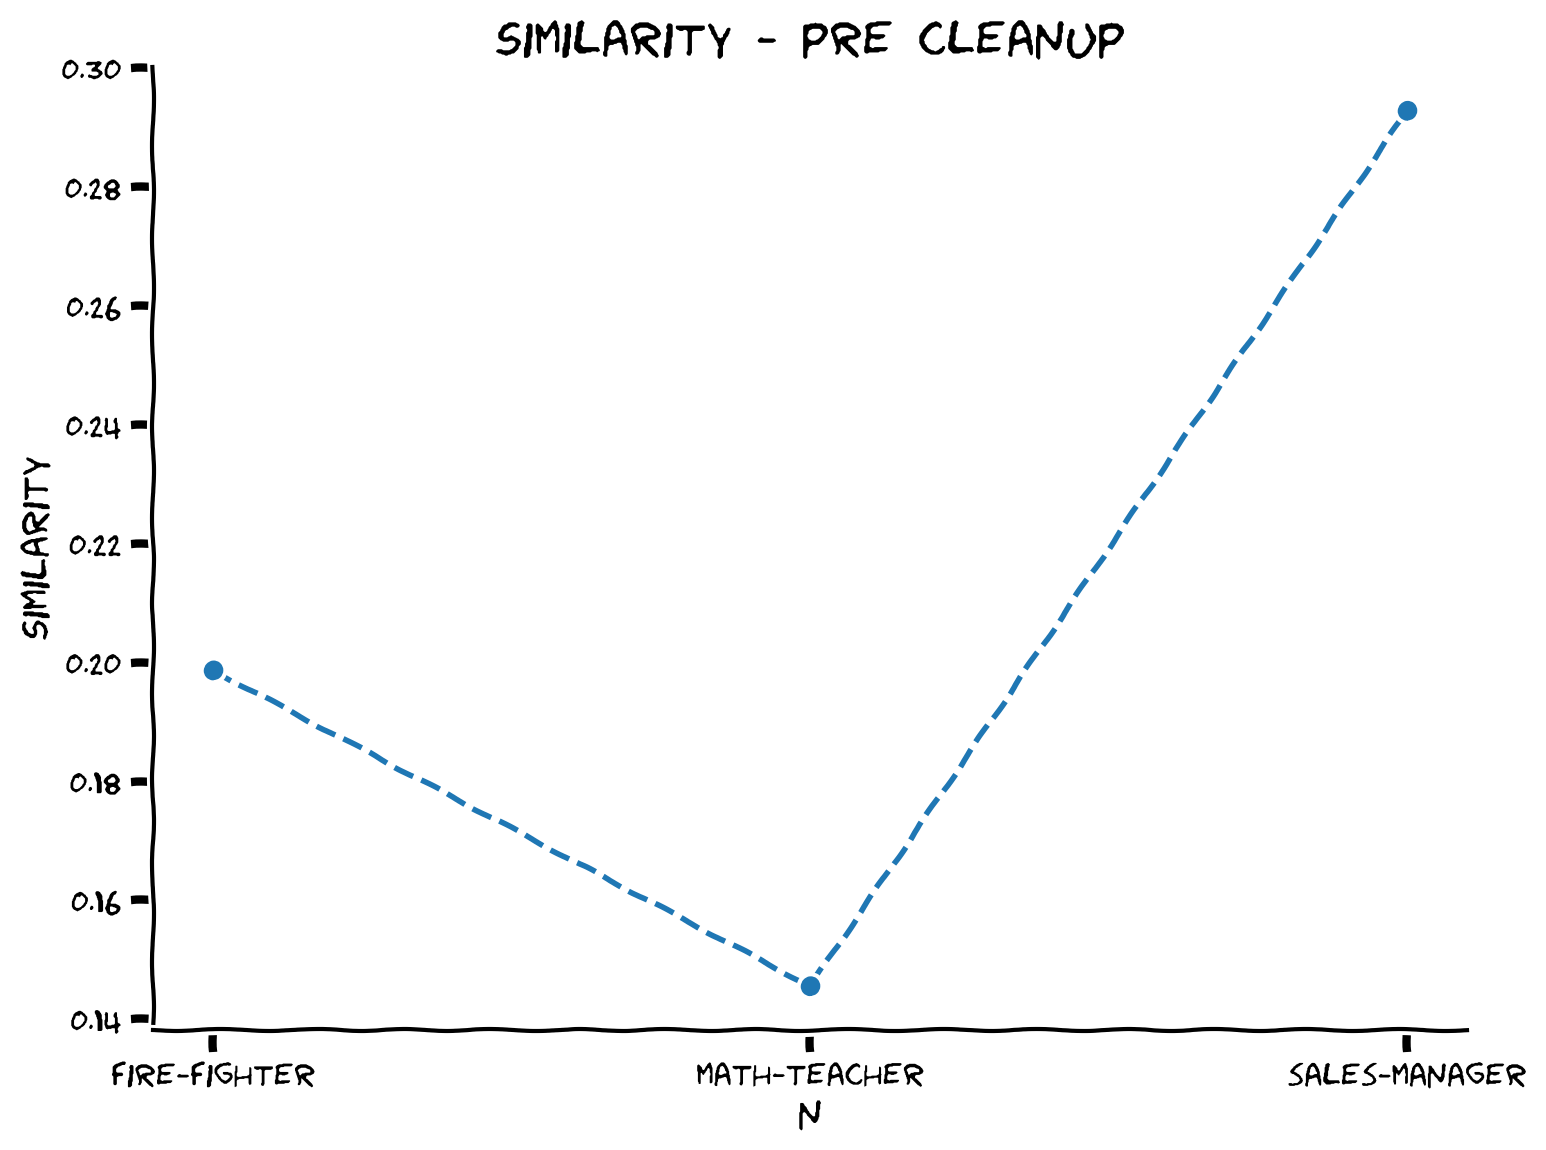

In [20]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete similarities calculation between noisy vector and given symbols.")
###################################################################
set_seed(42)

symbol_names = ['fire-fighter','math-teacher','sales-manager']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=1024, optimize=False)

vocab = {n:discrete_space.encode(n) for n in symbol_names}

noisy_vector = 0.2 * vocab['fire-fighter'] + 0.15 * vocab['math-teacher'] + 0.3 * vocab['sales-manager']

sims = np.array([noisy_vector | vocab[name] for name in symbol_names]).squeeze()

plot_line_similarity_matrix(sims, symbol_names, multiple_objects = False, title = 'Similarity - pre cleanup')

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_7024b3c7.py)

*Example output:*

<img alt='Solution hint' align='left' width=773.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/NeuroAI_Course/main/tutorials/W2D2_NeuroSymbolicMethods/static/W2D2_Tutorial1_Solution_7024b3c7_0.png>



Conceptually, with a discrete vocabulary, we can clean up a vector by finding the reference vector that's closest to the noisy vector and replacing it:

$$\text{cleanup}(\boldsymbol{x}) = \arg\max_{\boldsymbol{w} \in \text{vocab}} \boldsymbol{x} \cdot \boldsymbol{w}$$

Now, let's construct a simple one-hidden layer neural network that does cleanup using a soft version of this operation, replacing the max operation with a softmax. The input weights will be the vectors in the vocabulary, and we will place a softmax function on the hidden layer. The output weights will again be the vectors representing the symbols in the vocabulary.

To snap the corrupted vectors back to the vocabulary, we'll apply this operation:

$$\text{cleanup}(\boldsymbol{x}) = \text{softmax}(T \cdot \boldsymbol{x} \boldsymbol{W}^T) \boldsymbol{W}$$

Where $T$ is the temperature parameter, and $\boldsymbol{W}$ is the matrix of vectors in the vocabulary. As $T \to \infty$, this operation converges to the original hard max cleanup operation. Your task is to complete the `__call__` function. Then, we calculate the similarity between the obtained vector and the ones in the vocabulary.

Observe the result and compare it to the pre-cleanup metrics.

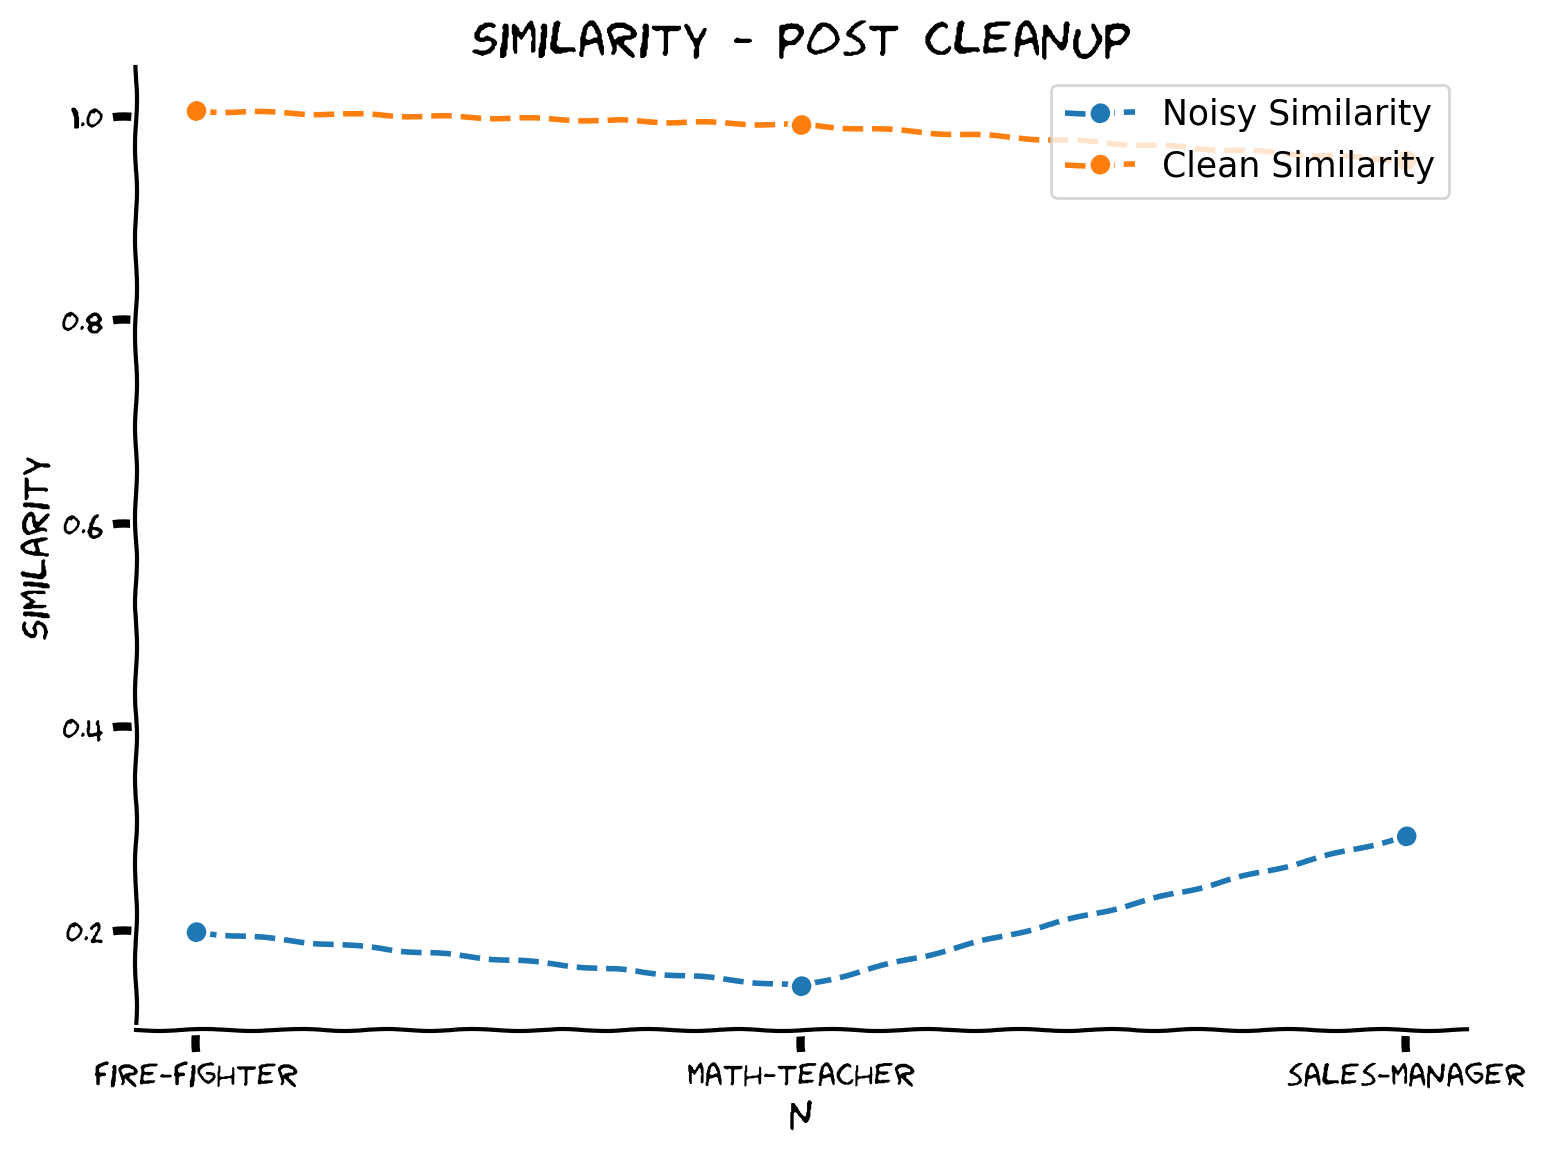

In [22]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete Cleanup class.")
###################################################################

set_seed(42)

class Cleanup:
    def __init__(self, vocab, temperature=1e5):
        self.weights = np.array([vocab[k] for k in vocab.keys()]).squeeze()
        self.temp = temperature
    def __call__(self, x):
        ###################################################################
        ## Fill out the following then remove
        #raise NotImplementedError("Student exercise: complete similarity calculation between input vector and weights of the network.")
        ###################################################################
        sims = x @ self.weights.T
        max_sim = softmax(sims * self.temp, axis=0)
        return sspspace.SSP(max_sim @ self.weights)


cleanup = Cleanup(vocab)

clean_vector = cleanup(noisy_vector)

clean_sims = np.array([clean_vector | vocab[name] for name in symbol_names]).squeeze()

plot_double_line_similarity_matrix([sims, clean_sims], symbol_names, ['Noisy Similarity', 'Clean Similarity'], title = 'Similarity - post cleanup')

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_5c01f587.py)

*Example output:*

<img alt='Solution hint' align='left' width=773.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/NeuroAI_Course/main/tutorials/W2D2_NeuroSymbolicMethods/static/W2D2_Tutorial1_Solution_5c01f587_0.png>



For the scenario where we have a discrete, known vocabulary, we can do this cleanup with a single feed-forward network, and we don't need to learn any of the synaptic weights.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_cleanup_memories_to_find_the_best_fit")

# Section 5: Iterated Binding

Estimated timing to here from start of tutorial: 45 minutes

In this section, we will represent numbers with iterated binding.

In [ ]:
# @title Video 6: Iterated Binding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'jUUkxnVHGnY'), ('Bilibili', 'BV1Qs421u7jj')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_iterated_binding")

## Coding Exercise 6: Representing Numbers

It is often useful to be able to represent numbers. For example, we may want to represent the position of an object in a list, or we may want to represent the coordinates of an object in a grid. To do this, we use the binding operator to construct a vector that represents a number. We start by picking what we refer to as an "axis vector," let's call it $\texttt{one}$, and then iteratively apply binding like this:

$$
\texttt{two} = \texttt{one}\circledast\texttt{one}
$$
$$
\texttt{three} = \texttt{two}\circledast\texttt{one} = \texttt{one}\circledast\texttt{one}\circledast\texttt{one}
$$

and so on. We extend that to arbitrary integers, $n$, by writing:

$$
\phi[n] = \underset{i=1}{\overset{n}{\circledast}}\texttt{one}
$$

Let's try that now and see how similarity between iteratively bound vectors develops. In the cell below, you should complete the missing part, which implements the iterative binding mechanism.

In [23]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete iterated binding.")
###################################################################

set_seed(42)

#define axis vector
axis_vectors = ['one']

encoder = sspspace.DiscreteSPSpace(axis_vectors, ssp_dim=1024, optimize=False)

#vocabulary
vocab = {w:encoder.encode(w) for w in axis_vectors}

#we will add new vectors to this list
integers = [vocab['one']]

max_int = 5
for i in range(2, max_int + 1):
    #bind one more "one" to the previous integer to get the new one
    integers.append(integers[-1] * vocab['one'])

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_f0f796f7.py)



Now, we will observe the similarity metric between the obtained vectors.

In [24]:
integers = np.array(integers).squeeze()
integer_sims = integers @ integers.T

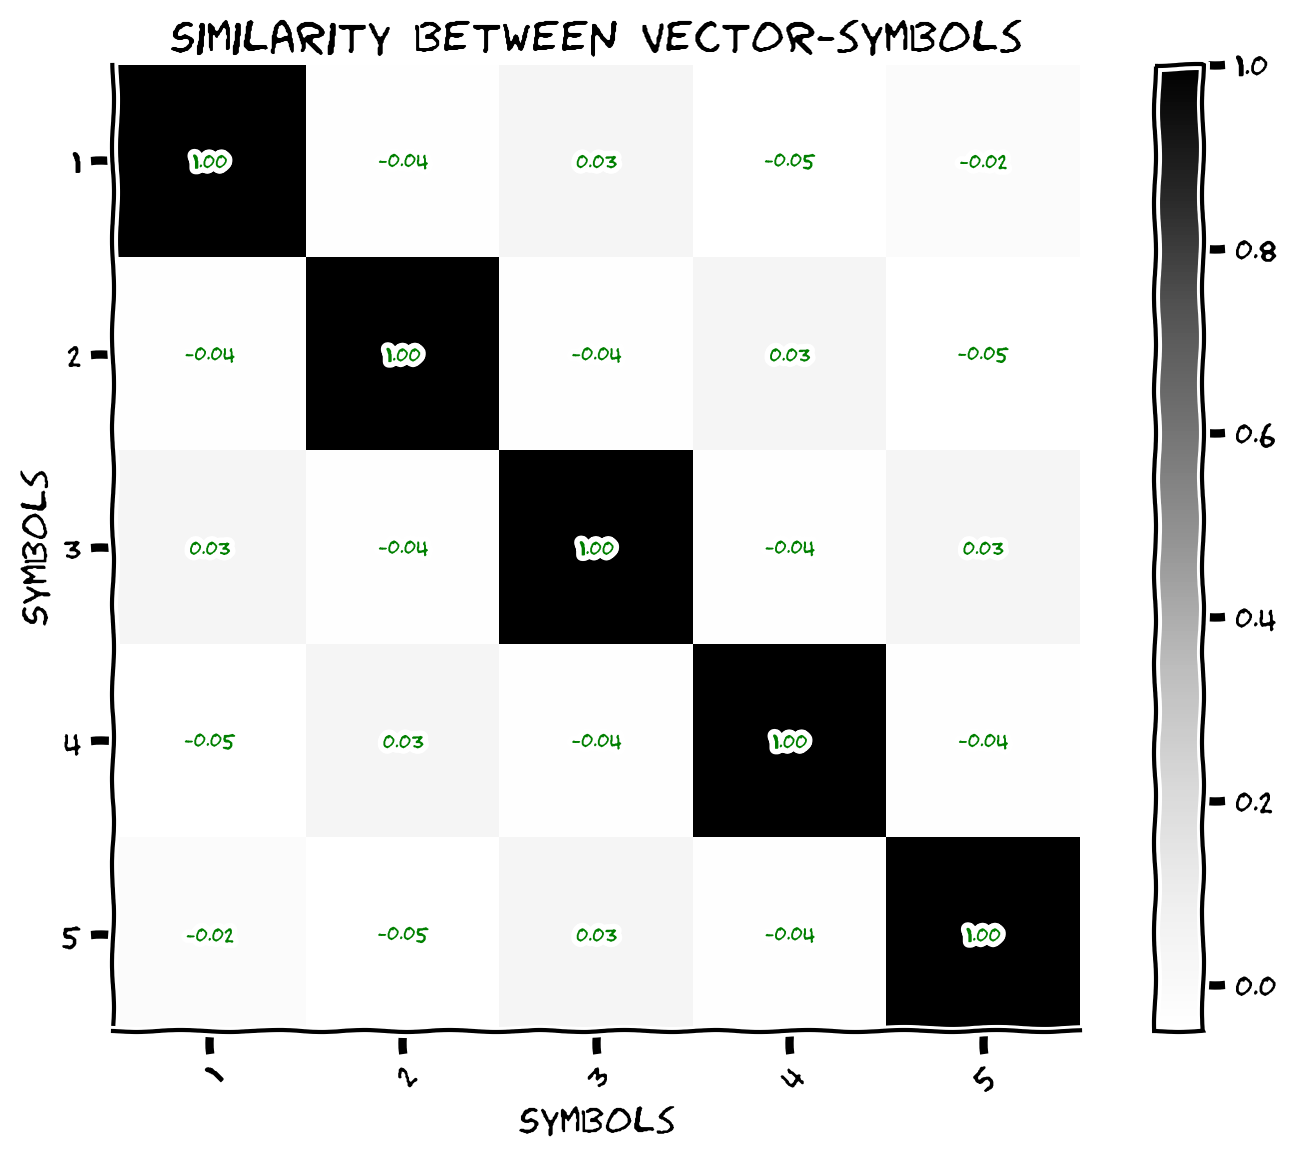

In [25]:
plot_similarity_matrix(integer_sims, [i for i in range(1, 6)], values = True)

Here, we will take a look at another graphical representation of the similarity through lines (the only difference with the previous section is the fact that here, we will have a couple of them, each representing a distinct concept).

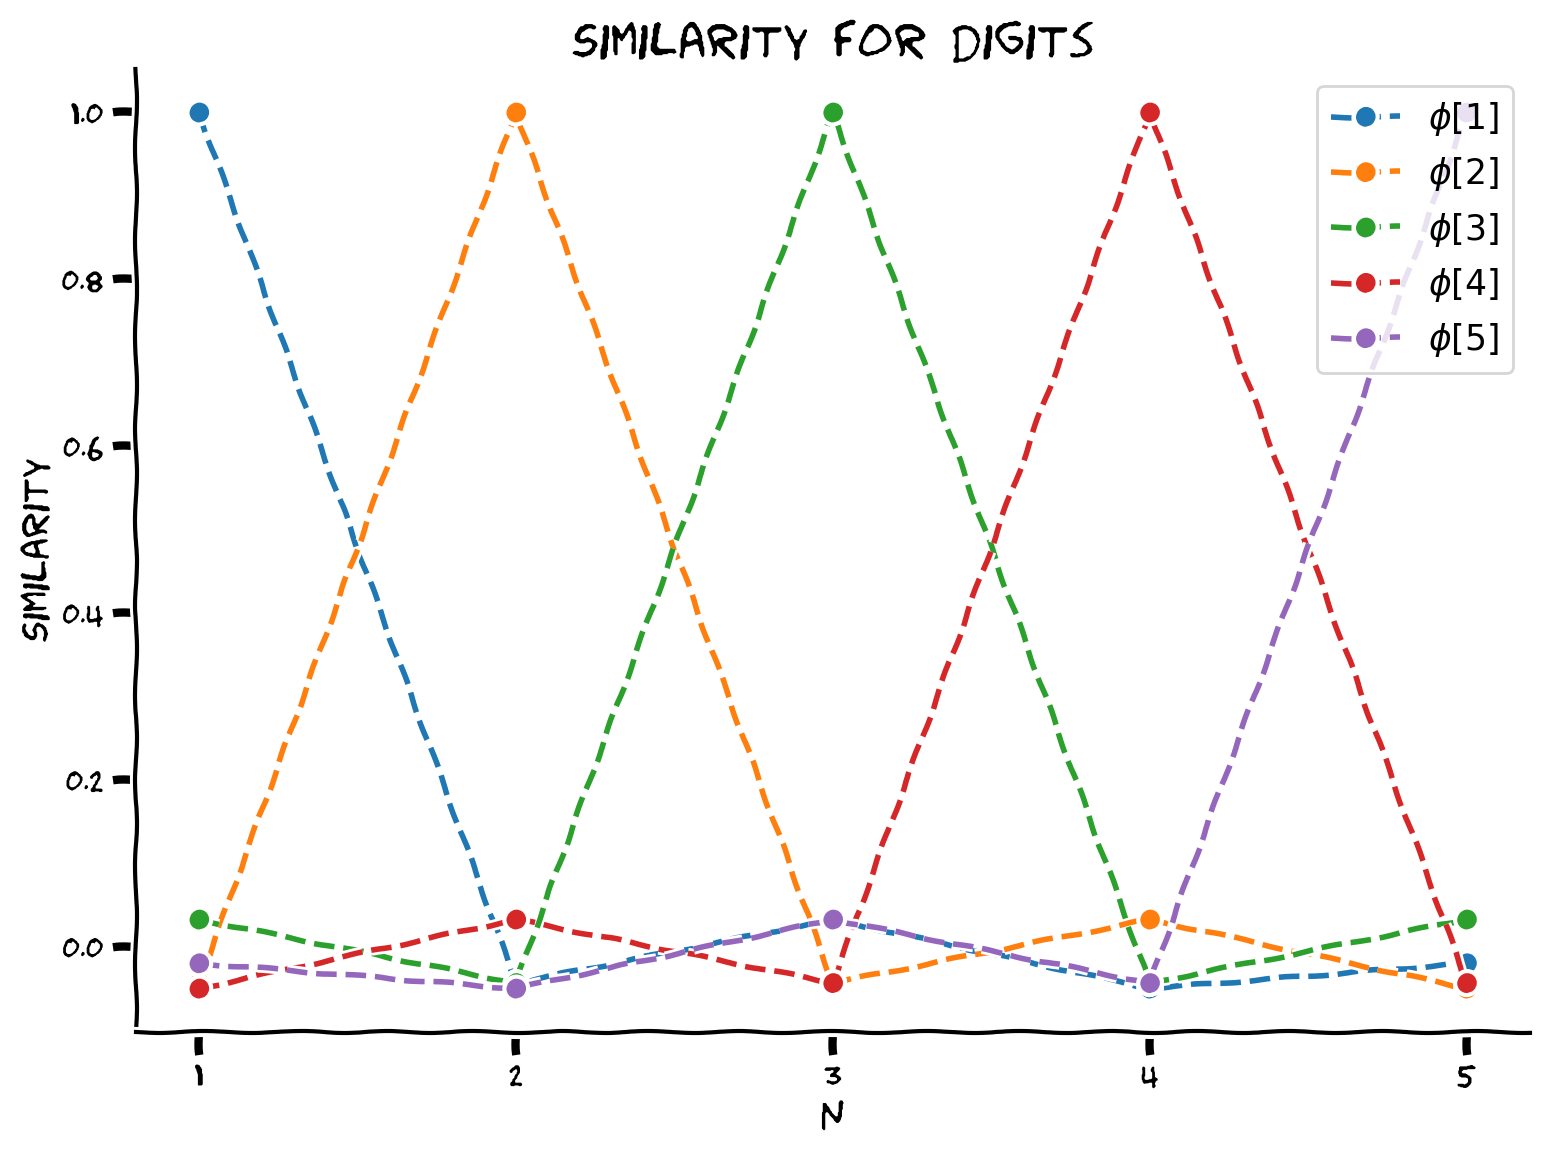

In [26]:
plot_line_similarity_matrix(integer_sims, range(1, 6), multiple_objects = True, labels = [f'$\phi$[{idx+1}]' for idx in range(5)], title = "Similarity for digits")

What we can see here is that each number acts like its own vector; they are highly dissimilar, but we can still do arithmetic with them. Let's see what happens when we unbind $\texttt{two}$ from $\texttt{five}$.

In the cell below you are invited to complete the missing parts (be attentive! python is zero-indexed, thus you need to choose the correct indices).

In [27]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: unbinding of two from five.")
###################################################################

five_unbind_two = sspspace.SSP(integers[4]) * ~sspspace.SSP(integers[1])
five_unbind_two_sims = five_unbind_two @ integers.T

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_04cf23a5.py)



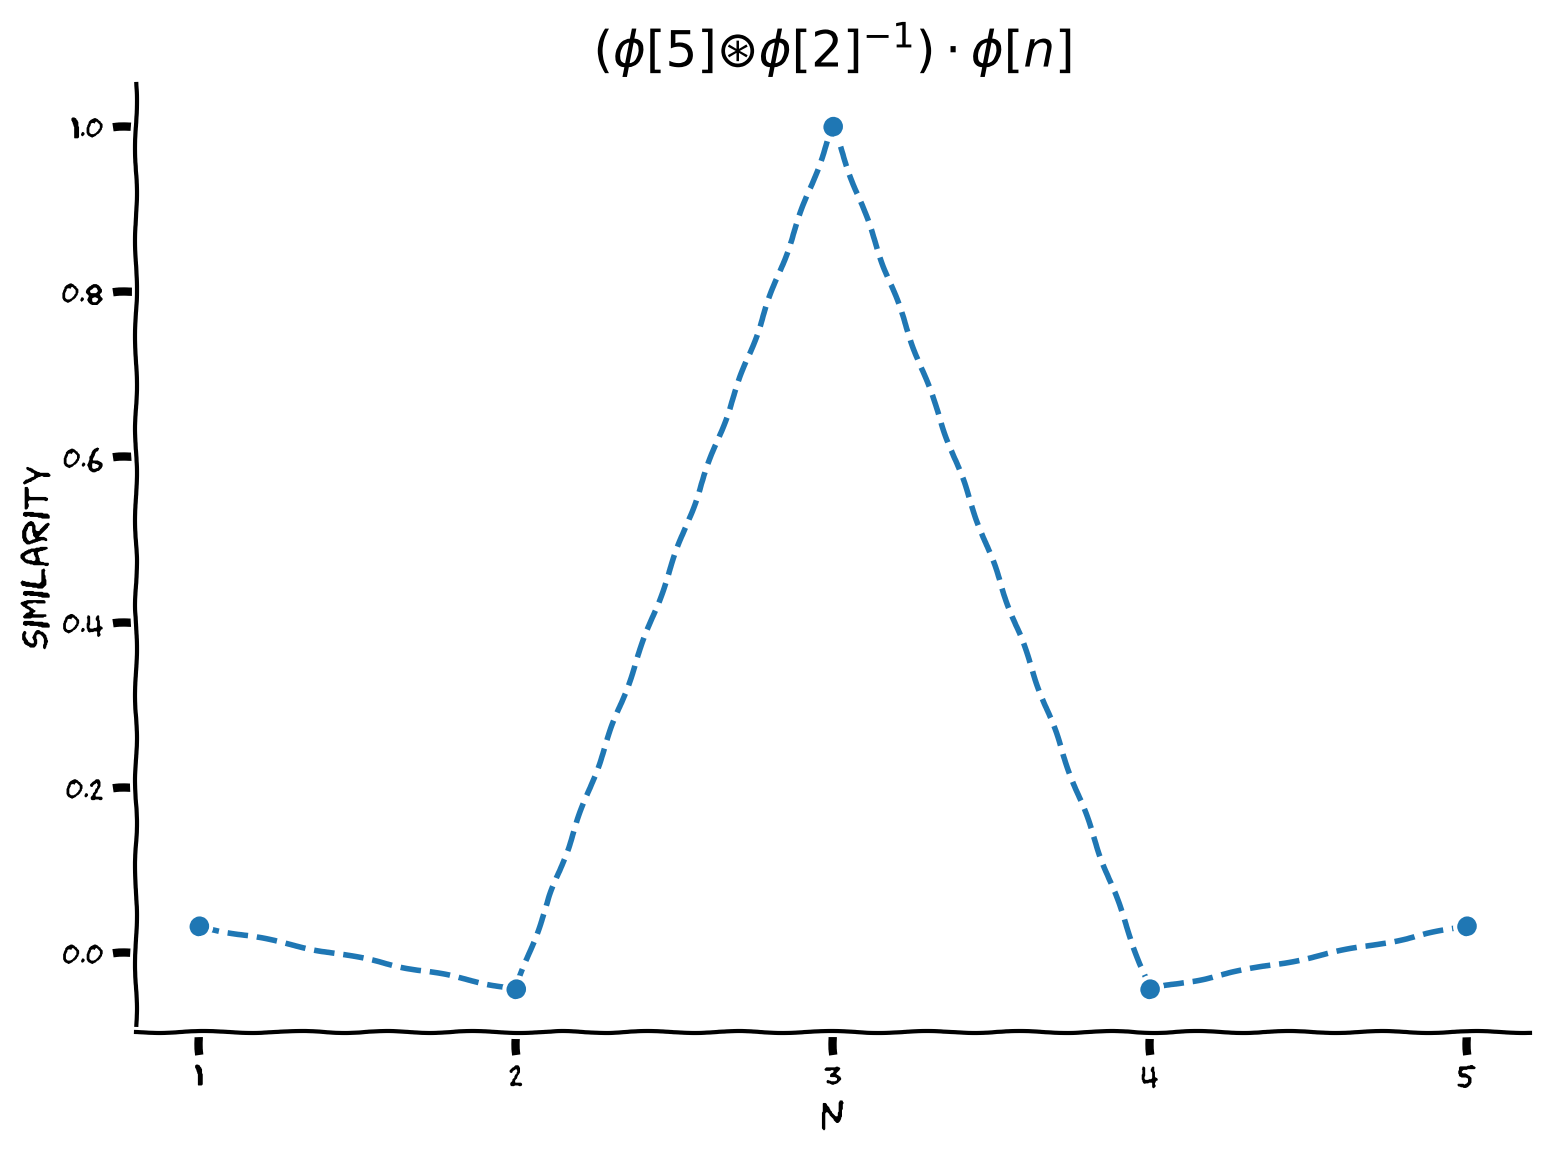

In [28]:
plot_line_similarity_matrix(five_unbind_two_sims, range(1, 6), multiple_objects = False,  title = '$(\phi[5]\circledast \phi[2]^{-1}) \cdot \phi[n]$')

We get what we expected - when we removed $\texttt{two}$ from $\texttt{five}$ we get a vector that is similar to $\texttt{three}$.  We can do arithmetic with our vector encoding!

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_representing_numbers")

## Coding Exercise 7: Beyond Binding Integers

In [ ]:
# @title Video 7: Fractional Binding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'mTIodqegq_4'), ('Bilibili', 'BV1b4421Q7mS')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_fractional_binding")

This is all well and good, but sometimes, we want to encode values that are not integers. Is there an easy way to do this? You'll be surprised to learn that the answer is: yes.

We actually use the same technique, but we recognize that iterated binding can be implemented in the Fourier domain:

$$
\phi[n] = \mathcal{F}^{-1}\left\{\mathcal{F}\left\{\texttt{one}\right\}^{n}\right\}
$$

where the power of $n$ in the Fourier domain is applied element-wise to the vector. To encode real-valued data, we simply let the integer value, $n$, be a real-valued vector, $x$, and we let the axis vector be a randomly generated vector, $X$.

$$
\phi(x) = \mathcal{F}^{-1}\left\{\mathcal{F}\left\{X\right\}^{x}\right\}
$$

We call vectors that represent real-valued data Spatial Semantic Pointers (SSPs). We can also extend this to multi-dimensional data by binding different SSPs together.

$$
\phi(x,y) = \phi_{X}(x) \circledast \phi_{Y}(y)
$$


In the $\texttt{sspspace}$ library, we provide an encoder for real- and integer-valued data, and we'll demonstrate it next by encoding a bunch of points in the range $[-4,4]$ and comparing their value to $0$, encoded with SSP.

In the cell below, you should complete the similarity calculation by injecting the correct index for the $0$ element (observe that it is right in the middle of the encoded array).

In [29]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: complete similarity calculation: correct index for `0` and array.")
###################################################################

set_seed(42)
encoder = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)

xs = np.linspace(-4,4,401)[:,None] #we expect the encoded values to be two-dimensional in `encoder.encode()` so we add extra dimension
phis = encoder.encode(xs)

#`0` element is right in the middle of phis array! notice that we have 401 samples inside it
sims = phis[200, :] @ phis.T

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_06eca8eb.py)



/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


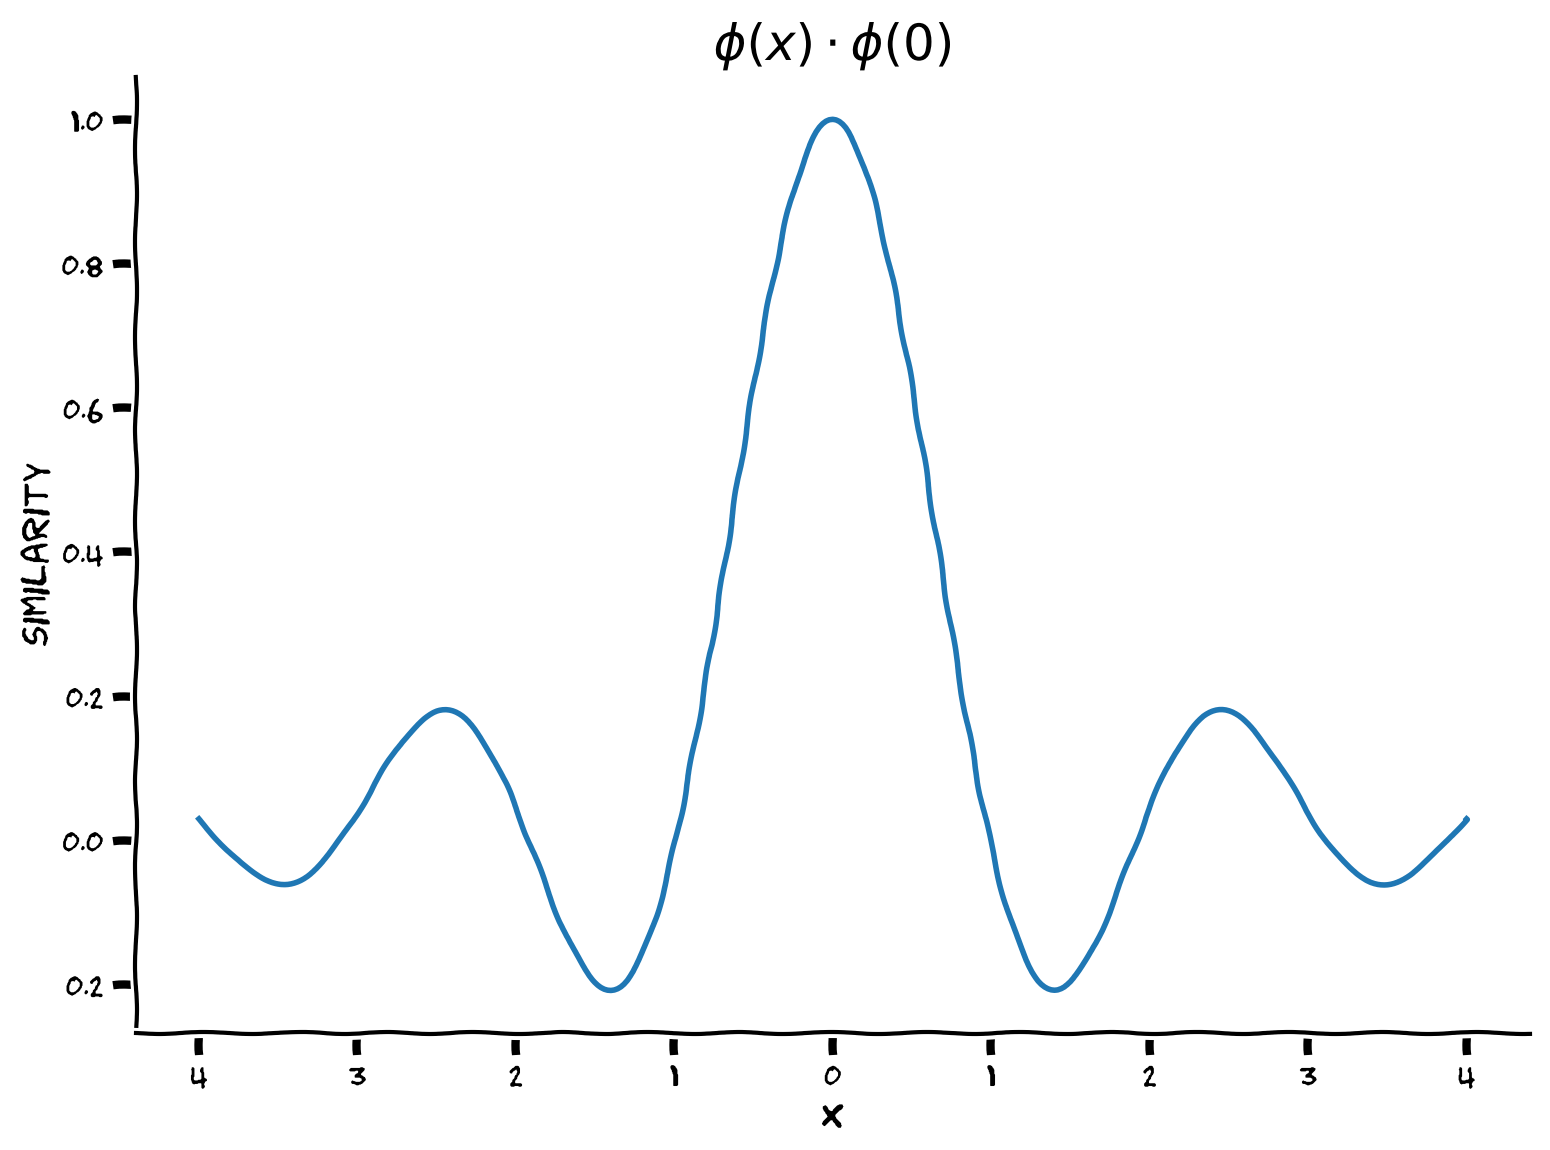

In [30]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot\phi(0)$')

As with the integers, we can update the values post-encoding through the binding operation.  Let's look at the similarity between all the points in the range $[-4,4]$, this time with the value $\pi/2$, but we will shift it by binding the origin with the desired shift value.

In the cell below, you need to provide the value for which we are going to shift the origin.

In [31]:
###################################################################
## Fill out the following then remove
#raise NotImplementedError("Student exercise: provide value to shift and observe the usage of the operation.")
###################################################################

phi_shifted = phis[200,:][None,:] * encoder.encode([[np.pi/2]])
sims = phi_shifted.flatten() @ phis.T

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_d3fe205a.py)



/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


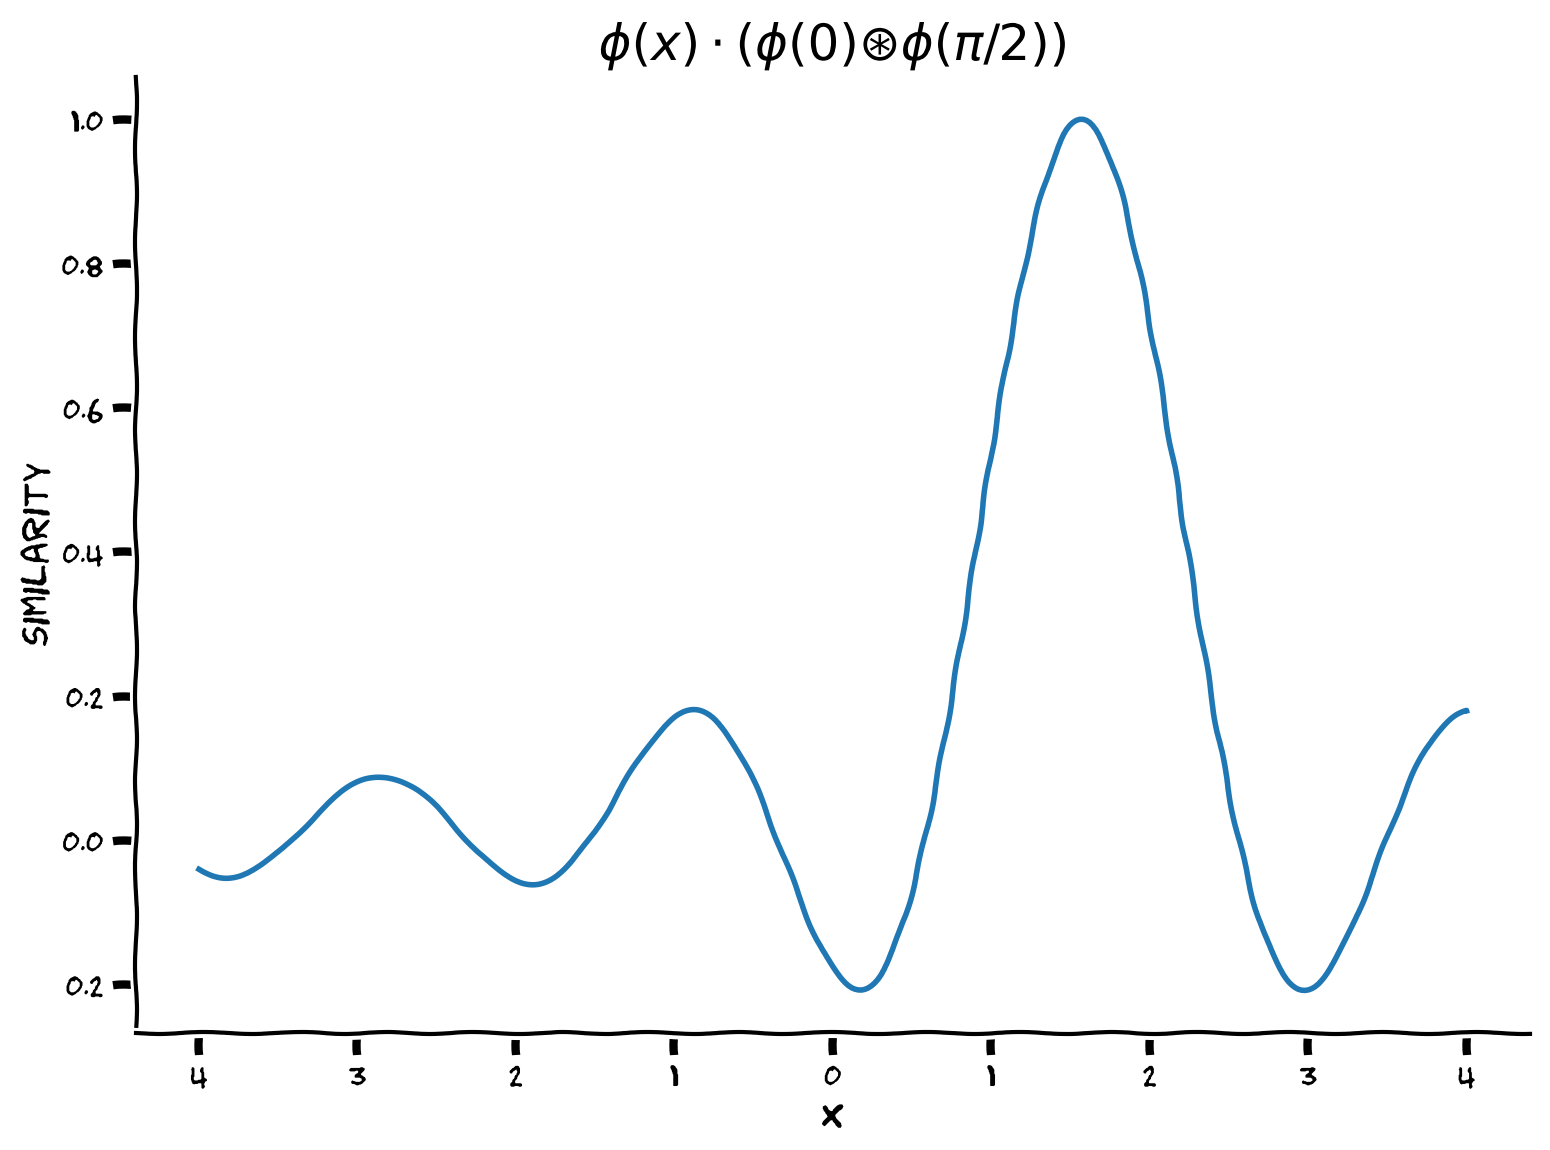

In [32]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot(\phi(0)\circledast\phi(\pi/2))$')

We can then take that vector and shift it again to a new location.

In [33]:
phi_shifted = phis[200,:][None,:] * encoder.encode([[-1.5*np.pi]])
sims = phi_shifted.flatten() @ phis.T

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


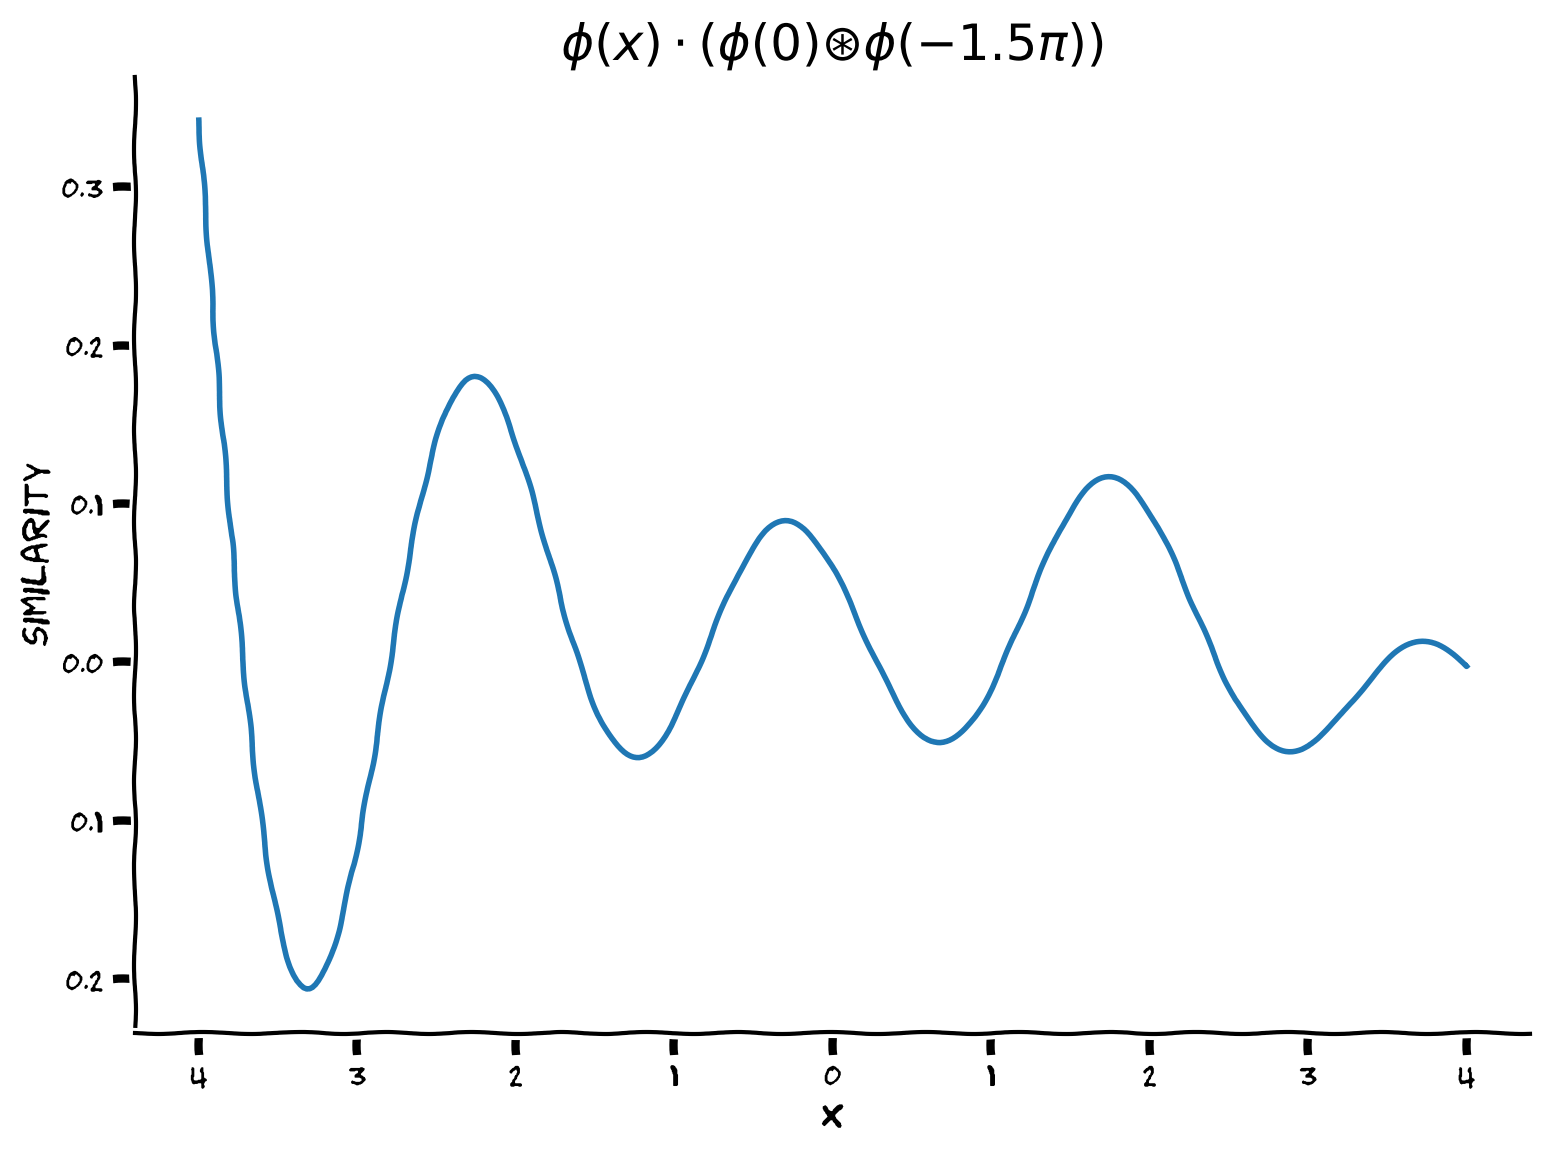

In [34]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot(\phi(0)\circledast\phi(-1.5\pi))$')

We will go on to use these encodings to build spatial maps in Tutorial 3.

### Coding Exercise 7 Discussion

1. How would you explain the lines `sims = vector @ phis.T` in the previous coding exercises?

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_87190668.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_beyond_bidning_integers")

In [ ]:
# @title Video 8: Iterated Binding Conclusion

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'zXYODzMw_Vc'), ('Bilibili', 'BV1Wm421L7ax')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_iterated_binding_conclusion")

---
# Summary

*Estimated timing of tutorial: 1 hour*

In this tutorial, we developed the toolbox of the main operations on the vector symbolic algebra. In particular, it includes:
- similarity operation (|), which measures how similar the two vectors are (by calculating their dot product);
- bundling (+), which creates new set-like objects using vector addition;
- binding ($\circledast$), which creates a new combined representation of the two given objects using circular convolution;
- unbinding (~), which allows to derive a pure object from the bound representation by unbinding another one that stands in the pair;
- cleanup, which tries to identify the most similar vector in the vocabulary with multiple possible implementations.
- iterated binding, which allows one to "count" by iteratively binding an axis vector with itself.
- encoding real-valued data using fractional binding.

In the following tutorials, we will take a look at how we can use these tools to create more complicated structures and derive useful information from them.